<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
housing_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
housing_boston.loc[:, 'MEDV'] = boston.target

housing_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
housing_boston.shape

(506, 14)

In [5]:
housing_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
housing_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
housing_boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

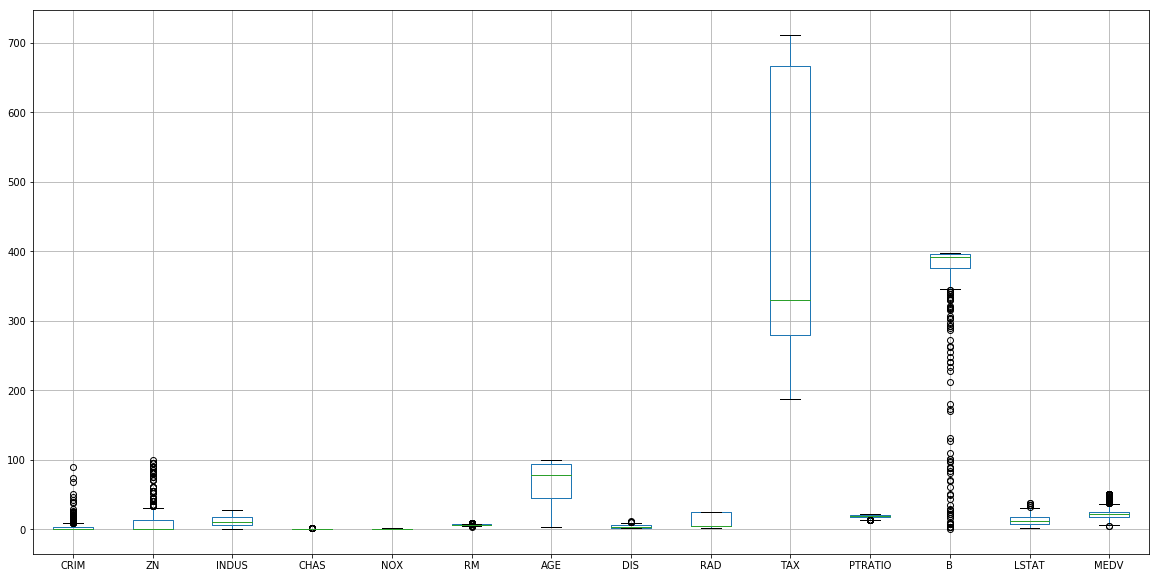

In [15]:
housing_boston.boxplot(figsize=(20,10));

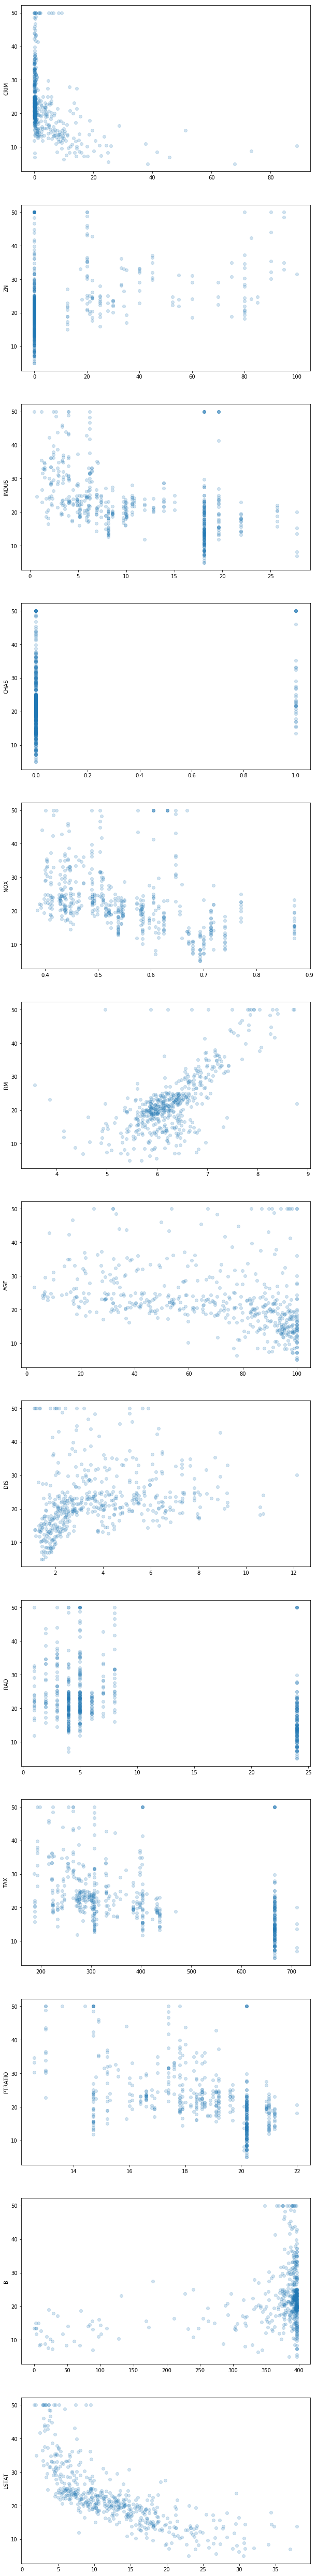

In [51]:


fig, axes = plt.subplots(13, 1, figsize=(10, 91))
axes[0].scatter(data=housing_boston, x='CRIM', y='MEDV', alpha=.2)
axes[1].scatter(data=housing_boston, x='ZN', y='MEDV', alpha=.2)
axes[2].scatter(data=housing_boston, x='INDUS', y='MEDV', alpha=.2)
axes[3].scatter(data=housing_boston, x='CHAS', y='MEDV', alpha=.2)
axes[4].scatter(data=housing_boston, x='NOX', y='MEDV', alpha=.2)
axes[5].scatter(data=housing_boston, x='RM', y='MEDV', alpha=.2)
axes[6].scatter(data=housing_boston, x='AGE', y='MEDV', alpha=.2)
axes[7].scatter(data=housing_boston, x='DIS', y='MEDV', alpha=.2)
axes[8].scatter(data=housing_boston, x='RAD', y='MEDV', alpha=.2)
axes[9].scatter(data=housing_boston, x='TAX', y='MEDV', alpha=.2)
axes[10].scatter(data=housing_boston, x='PTRATIO', y='MEDV', alpha=.2)
axes[11].scatter(data=housing_boston, x='B', y='MEDV', alpha=.2)
axes[12].scatter(data=housing_boston, x='LSTAT', y='MEDV', alpha=.2)
axes[0].set_ylabel('CRIM')
axes[1].set_ylabel('ZN')
axes[2].set_ylabel('INDUS')
axes[3].set_ylabel('CHAS')
axes[4].set_ylabel('NOX')
axes[5].set_ylabel('RM')
axes[6].set_ylabel('AGE')
axes[7].set_ylabel('DIS')
axes[8].set_ylabel('RAD')
axes[9].set_ylabel('TAX')
axes[10].set_ylabel('PTRATIO')
axes[11].set_ylabel('B')
axes[12].set_ylabel('LSTAT');

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [66]:
from sklearn import metrics

y = housing_boston.loc[:, 'MEDV']

null_pred = np.zeros(y.shape)
null_pred += np.mean(y)

metrics.mean_squared_error(y, null_pred)

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


feature_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X = housing_boston.loc[:, feature_cols]
y = housing_boston.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
test_rsq = lr.score(X_test, y_test)
print('test-set R-squared', test_rsq)
print('train MSE', metrics.mean_squared_error(y_train, y_train_pred))
print('test MSE', metrics.mean_squared_error(y_test, y_test_pred))


test-set R-squared 0.7711010303701006
train MSE 22.632150634524148
test MSE 20.78145965114436


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [64]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

train_mse_values = []
test_mse_values = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    print('train_mse:', train_mse)
    print('test_mse:', test_mse)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

print('Average train MSE', sum(train_mse_values)/10)
print('Average test MSE', sum(test_mse_values)/10)

train_mse: 21.435235095501547
test_mse: 27.123668446942123
train_mse: 22.792915250131053
test_mse: 14.382928754986283
train_mse: 20.812248563662752
test_mse: 32.94014411976263
train_mse: 21.692273730544052
test_mse: 24.900934249993526
train_mse: 22.19086866866743
test_mse: 20.49173741849682
train_mse: 22.439997455532414
test_mse: 18.377255461122385
train_mse: 21.69768540886836
test_mse: 24.350691330733593
train_mse: 21.76069446134628
test_mse: 25.365301867877395
train_mse: 22.40425863879665
test_mse: 17.835175818121275
train_mse: 20.605358320520274
test_mse: 35.55012639944714
Average train MSE 21.783153559357082
Average test MSE 24.131796386748317


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Our model's average training MSE (21.8) is beating the null_pred MSE (84.4), so the bias is lower and these features taken together have correlations to our target. However, we may have a variance problem. That is something comparing the test prediction accuracy will tell us.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

On average the test set (24.1) performed worse than that training set (21.8). Also, individual scores for each fold varried more greatly than on training data. This makes me concerned that we have overfit and do have a variance problem in our model.

- How much of a bias problem does your model appear to have? Why do you say that?

I would say that the current model has less of a bias problem--though feature engineering may be able to find a better fit.

- How much of a variance problem does your model appear to have? Why do you say that?

The variance problem looks to be the larger issue. Looking at the MSE for each testing fold the error is varrying wildly. So the model's performance varries on the test data held out. It might make more sense to find the features which most correlate with the patters we see and drop the others. Then use transformations in order to more closely fit our model with these features.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

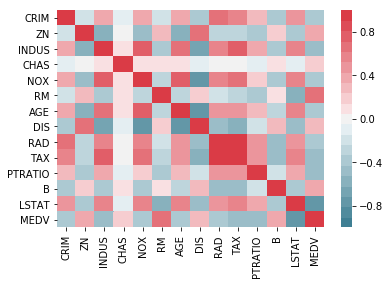

In [67]:
import seaborn as sns

sns.heatmap(housing_boston.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

In [73]:
feature_cols = ['RM','LSTAT', 'INDUS', 'TAX', 'PTRATIO']

X = housing_boston.loc[:, feature_cols]
y = housing_boston.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
test_rsq = lr.score(X_test, y_test)
print('test-set R-squared', test_rsq)
print('train MSE', metrics.mean_squared_error(y_train, y_train_pred))
print('test MSE', metrics.mean_squared_error(y_test, y_test_pred))

test-set R-squared 0.6154896125477802
train MSE 25.892770113778685
test MSE 29.939264906345205


In [76]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

train_mse_values = []
test_mse_values = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    print('train_mse:', train_mse)
    print('test_mse:', test_mse)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

print('Average train MSE', sum(train_mse_values)/10)
print('Average test MSE', sum(test_mse_values)/10)

train_mse: 27.338076689648542
test_mse: 24.593795158775983
train_mse: 27.33789651061188
test_mse: 24.722583626301358
train_mse: 27.4177386720028
test_mse: 23.419560499096665
train_mse: 27.37463919979379
test_mse: 23.819019810222038
train_mse: 27.97296545025688
test_mse: 18.353356732744516
train_mse: 26.416720430945695
test_mse: 32.3537454747668
train_mse: 25.936408810616275
test_mse: 37.934255444544775
train_mse: 27.14626861318206
test_mse: 26.10520984620889
train_mse: 25.968382219763637
test_mse: 36.5525439927203
train_mse: 26.322081005953702
test_mse: 33.30918525666196
Average train MSE 26.923117760277528
Average test MSE 28.116325584204326


The model is worse with a higher bias problem than before. The test MSE is off by 28.5 rather than 24.1. The variance is still high between the folds as well. Overall, the difference between the train and test MSE did go down, but feature engineering would be needed to make a better model with these features.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [75]:
housing_boston.loc[:, 'LSTAT_SQ'] = housing_boston.loc[:, 'LSTAT']**2
housing_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_SQ
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,28.4089


In [77]:
feature_cols = ['RM','LSTAT', 'INDUS', 'TAX', 'PTRATIO', 'LSTAT_SQ']

X = housing_boston.loc[:, feature_cols]
y = housing_boston.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
test_rsq = lr.score(X_test, y_test)
print('test-set R-squared', test_rsq)
print('train MSE', metrics.mean_squared_error(y_train, y_train_pred))
print('test MSE', metrics.mean_squared_error(y_test, y_test_pred))

test-set R-squared 0.7660328721405715
train MSE 24.950416164402256
test MSE 17.91283602121479


In [78]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

train_mse_values = []
test_mse_values = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test, y_pred_test)
    
    print('train_mse:', train_mse)
    print('test_mse:', test_mse)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

print('Average train MSE', sum(train_mse_values)/10)
print('Average test MSE', sum(test_mse_values)/10)

train_mse: 23.70913054977769
test_mse: 13.989944544313076
train_mse: 21.933384370754645
test_mse: 30.14199068443414
train_mse: 21.96382372687364
test_mse: 29.59853857342031
train_mse: 21.467600572797643
test_mse: 33.85463942527963
train_mse: 23.11731686312907
test_mse: 19.16481798186536
train_mse: 23.385898241868716
test_mse: 16.94143765618901
train_mse: 21.638304889296524
test_mse: 32.96363020588205
train_mse: 23.00337328359775
test_mse: 20.419975746928877
train_mse: 22.7973327042893
test_mse: 22.278441629267444
train_mse: 23.350464711964054
test_mse: 16.95624284710461
Average train MSE 22.636662991434903
Average test MSE 23.630965929468452


Looking at the scatterplots I saw what looked like a poly relationship with LSTAT which had a pretty strong correlation already. So I added a feature with the square of LSTAT and the model did improve on test data and is now beating the original model. Better yet, the variance is down between folds. Incremental improvement.

# KNN Practice

In [81]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [83]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [86]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [87]:
iris.shape

(150, 6)

In [89]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [90]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [93]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [92]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

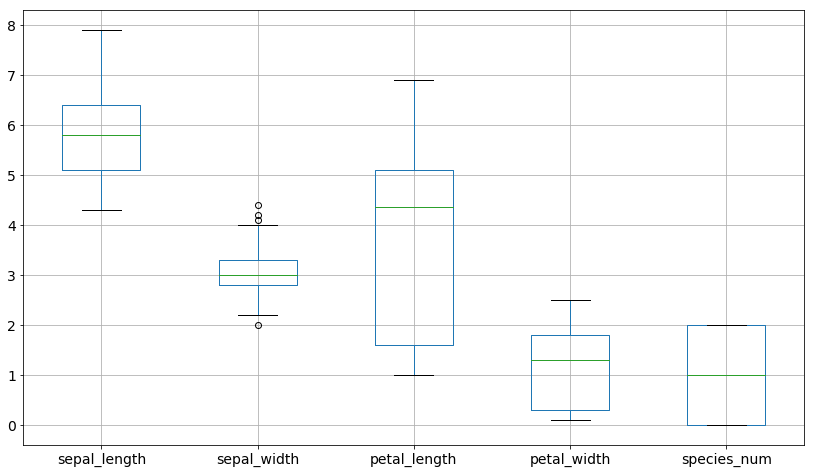

In [96]:
iris.boxplot(figsize=(14, 8));

- Get the accuracy of a null model that simply predicts the most common species.

In [99]:
y = iris.loc[:, 'species_num']

most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_pred

print('Null MSE', metrics.mean_squared_error(y, null_pred))
print('Null accuracy', metrics.accuracy_score(null_pred, y))

Null MSE 1.6666666666666667
Null accuracy 0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [101]:
#Starting with a train test and then next cell will have the k-fold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

X_train, X_test, y_train, y_test = (train_test_split(X, y, shuffle=True))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
test_accuracy

0.9736842105263158

In [104]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

train_accuracy_values = []
test_accuracy_values = []

for train_indices, test_indices in kf.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=5)
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    
    print('train_accuracy:', train_accuracy)
    print('test_accuracy:', test_accuracy)
    
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

print('Average train accuracy', sum(train_accuracy_values)/10)
print('Average test accuracy', sum(test_accuracy_values)/10)

train_accuracy: 0.9703703703703703
test_accuracy: 1.0
train_accuracy: 0.9629629629629629
test_accuracy: 0.9333333333333333
train_accuracy: 0.9777777777777777
test_accuracy: 0.9333333333333333
train_accuracy: 0.9703703703703703
test_accuracy: 1.0
train_accuracy: 0.9703703703703703
test_accuracy: 0.9333333333333333
train_accuracy: 0.9629629629629629
test_accuracy: 1.0
train_accuracy: 0.9851851851851852
test_accuracy: 0.9333333333333333
train_accuracy: 0.9777777777777777
test_accuracy: 0.8666666666666667
train_accuracy: 0.9629629629629629
test_accuracy: 1.0
train_accuracy: 0.9629629629629629
test_accuracy: 1.0
Average train accuracy 0.9703703703703704
Average test accuracy 0.96


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

much, much better. The null model accuracy was .33 while the average test accuracy for this model is .96. This model shows low bias

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

the test set is a little worse off than the training set, .01 off. Also the test sets don't vary too wildly across folds. The worst performing fold was still a .87 accuracy score. This tells me that at k=5 we don't have much of a variance issue either.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

If I had to say, this has more of a variance problem because the folds do vary, but the overall accuracy is so high.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

train_accuracy_values = []
test_accuracy_values = []

for train_indices, test_indices in kf.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=5)
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    
    print('train_accuracy:', train_accuracy)
    print('test_accuracy:', test_accuracy)
    
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

print('Average train accuracy', sum(train_accuracy_values)/10)
print('Average test accuracy', sum(test_accuracy_values)/10)

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [128]:
test_scores = []
train_scores = []
test_accuracy_values = []
train_accuracy_values = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, shuffle=True)
    kf.split(X, y)
    for train_indices, test_indices in kf.split(X, y):
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        knn.fit(X_train, y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        
        test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
        test_accuracy_values.append(test_accuracy)
        
        train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
        train_accuracy_values.append(train_accuracy)
        
    test_scores.append(sum(test_accuracy_values)/10)
    train_scores.append(sum(train_accuracy_values)/10)

print(test_scores)
print(train_scores)

[0.9600000000000002, 1.906666666666667, 2.873333333333334, 3.8266666666666667, 4.786666666666665, 5.759999999999997, 6.713333333333329, 7.67333333333333, 8.63333333333333, 9.606666666666664, 10.573333333333332, 11.54, 12.513333333333332, 13.48, 14.453333333333337, 15.426666666666671, 16.400000000000006, 17.360000000000007, 18.333333333333343, 19.30000000000001, 20.273333333333348, 21.24666666666668, 22.21333333333335, 23.186666666666685, 24.133333333333354, 25.08666666666669, 26.040000000000028, 26.986666666666697, 27.940000000000033, 28.886666666666702, 29.826666666666704, 30.78000000000004, 31.72666666666671, 32.666666666666714, 33.62000000000005, 34.553333333333384, 35.51333333333339, 36.46000000000006, 37.40666666666673, 38.34000000000007, 39.26666666666674, 40.200000000000074, 41.14000000000008, 42.086666666666744, 43.03333333333342, 43.95333333333342, 44.886666666666756, 45.8000000000001, 46.733333333333434]
[1.0, 1.9792592592592595, 2.9407407407407407, 3.905925925925925, 4.87703

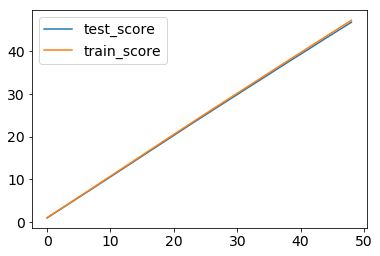

In [129]:
scores_df = pd.DataFrame()
scores_df = scores_df.fillna(0)

scores_df.loc[:, 'test_score'] = test_scores
scores_df.loc[:, 'train_score'] = train_scores
scores_df.plot();


as k nearest neightbors goes up the test score should go down. There is something wrong with my model here and I just figured it out as time is expiring. The value names for my test accuracy are probably confusing the model... adding something between 0 and 1 each time through.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
